In [1]:
import pandas as pd
tiles_df = pd.read_parquet('distinct_LONLAT.parquet', engine='pyarrow')
tiles_df


,XLON,XLAT,LONLAT_ID
0,-0.433273,51.626116,1
1,0.668106,51.672981,2
2,-0.473099,51.742762,3
3,-0.081711,51.580910,4
4,-0.493698,51.927754,5
...,...,...,...
892704,0.471725,51.508315,892705
892705,-0.173721,52.016585,892706
892706,0.611801,51.748714,892707
892707,0.365982,51.844687,892708


In [2]:
movement_df = pd.read_parquet('pre_processed_movement.parquet', engine='pyarrow')
movement_df

,AGG_DAY_PERIOD,LONLAT_ID,mean_column
0,2020-01-01,3,0.339944
1,2020-01-01,6,0.130376
2,2020-01-01,7,0.381778
3,2020-01-01,11,0.119285
4,2020-01-01,15,0.373764
...,...,...,...
61624146,2020-12-31,886042,0.155193
61624147,2020-12-31,886043,0.037002
61624148,2020-12-31,886044,0.112204
61624149,2020-12-31,886045,0.113549


<AxesSubplot: xlabel='XLON', ylabel='XLAT'>

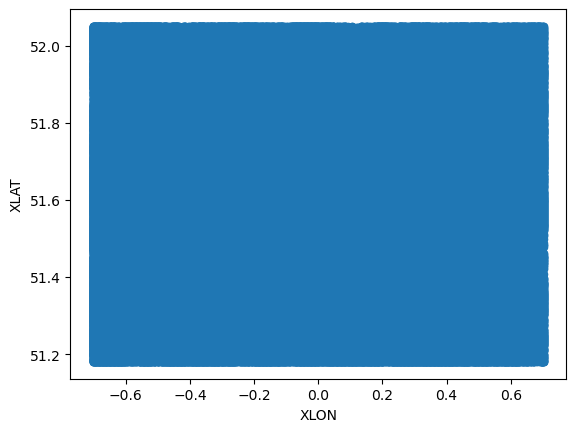

In [4]:
tiles_df.plot(x="XLON", y="XLAT", kind="scatter")

In [13]:
tiles_df.to_csv("tiles.csv")

In [7]:
movement_df_01_01 = movement_df[(movement_df.AGG_DAY_PERIOD =="2020-01-01")]
movement_df_01_01

,AGG_DAY_PERIOD,LONLAT_ID,mean_column
0,2020-01-01,3,0.339944
1,2020-01-01,6,0.130376
2,2020-01-01,7,0.381778
3,2020-01-01,11,0.119285
4,2020-01-01,15,0.373764
...,...,...,...
127643,2020-01-01,874699,0.390542
127644,2020-01-01,874700,0.078563
127645,2020-01-01,874701,0.083586
127646,2020-01-01,874702,0.067988


In [11]:
movement_df_01_01_tiles = pd.merge(movement_df_01_01, tiles_df, on="LONLAT_ID")
movement_df_01_01_tiles

,AGG_DAY_PERIOD,LONLAT_ID,mean_column,XLON,XLAT
0,2020-01-01,3,0.339944,-0.473099,51.742762
1,2020-01-01,6,0.130376,-0.275345,51.491217
2,2020-01-01,7,0.381778,-0.041885,51.480100
3,2020-01-01,11,0.119285,-0.067978,51.566400
4,2020-01-01,15,0.373764,-0.327530,51.510879
...,...,...,...,...,...
127643,2020-01-01,874699,0.390542,0.107803,51.219357
127644,2020-01-01,874700,0.078563,-0.364609,51.965000
127645,2020-01-01,874701,0.083586,0.643387,52.034330
127646,2020-01-01,874702,0.067988,0.192947,51.322459


<AxesSubplot: xlabel='XLON', ylabel='XLAT'>

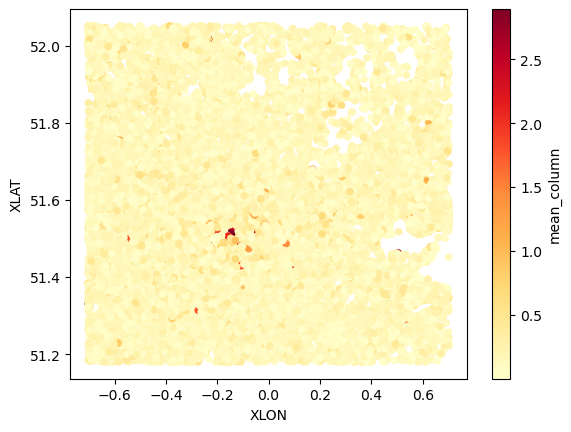

In [12]:
movement_df_01_01_tiles.plot(x="XLON", y="XLAT", kind="scatter",c="mean_column",
        colormap="YlOrRd" )

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
pnt1 = Point(-0.433273, 51.626116)
pnt2 = Point(0.668106, 51.672981)
points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
points_df = points_df.to_crs('EPSG:5234')
points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
print(points_df.distance(points_df2))